# Using Excel with Python and Pandas

System Prerequisites
We will use Python 3 and Jupyter Notebook to demonstrate the code in this tutorial.In addition to Python and Jupyter Notebook, you will need the following Python modules:

matplotlib - data visualization
NumPy - numerical data functionality
OpenPyXL - read/write Excel 2010 xlsx/xlsm files
pandas - data import, clean-up, exploration, and analysis
xlrd - read Excel data
xlwt - write to Excel
XlsxWriter - write to Excel (xlsx) files

In [1]:
!pip install xlrd
!pip install pandas

##### In this tutorial, we will use a multi-sheet Excel file we created from Kaggle's IMDB Scores data. You can download the file from this link : https://dq-blog-files.s3.amazonaws.com/movies.xls

##### Our Excel file has three sheets: '1900s,' '2000s,' and '2010s.' Each sheet has data for movies from those years.

# Read data from the Excel file

##### We need to first import the data from the Excel file into pandas. To do that, we start by importing the pandas module.


In [2]:
import pandas as pd

##### We then use the pandas' read_excel method to read in data from the Excel file. The easiest way to call this method is to pass the file name. If no sheet name is specified then it will read the first sheet in the index

In [3]:
excel_file = 'movies.xls'

movies = pd.read_excel(excel_file)

#for xlsx files
#movies = pd.read_excel(excel_file, engine='openpyxl')


In [4]:
# pd.read_excel(
#     io,  # File path, URL, Excel file-like object, or a buffer that contains the Excel data.
#     sheet_name=0,  # Specifies the sheet name or sheet number to read. Default is the first sheet.
#     header=0,  # Row to use as the column names. Default is the first row.
#     names=None,  # List of column names to use. If header is None, this parameter is ignored.
#     index_col=None,  # Column(s) to set as index (can be a single name/number or a list of names/numbers).
#     usecols=None,  # Columns to parse and use. Can be either a list of column indices/names or a range (e.g., "A:E").
#     dtype=None,  # Data type to force. If None, infer the data type.
#     engine=None,  # Parsing engine to use ('xlrd', 'openpyxl', 'odf', 'pyxlsb'). If None, tries multiple engines.
#     converters=None,  # Dictionary of functions for converting values in certain columns.
#     true_values=None,  # Values to consider as True.
#     false_values=None,  # Values to consider as False.
#     skiprows=None,  # Number of rows to skip at the beginning of the file.
#     nrows=None,  # Number of rows to read from the beginning of the file.
#     na_values=None,  # Additional strings to recognize as NA/NaN.
#     keep_default_na=True,  # Whether to include the default NaN values in addition to custom NA values.
#     verbose=False,  # Whether to print information about the file loading.
#     parse_dates=False,  # List of columns to parse as dates.
#     date_parser=None,  # Function to use for parsing dates.
#     thousands=None,  # Separator for thousands (e.g., ',' or '.').
#     comment=None,  # Character(s) to indicate comments in the Excel file.
#     skipfooter=0,  # Number of rows to skip at the end of the file.
#     convert_float=True,  # Whether to convert integral floats to integers.
#     mangle_dupe_cols=True,  # Whether to duplicate column names with ' .1', ' .2', etc.
#     **kwds  # Additional keyword arguments passed to the specific Excel engine.
# )

##### Pandas has a built-in DataFrame.head() method that we can use to easily display the first few rows of our DataFrame. If no argument is passed, it will display first five rows. If a number is passed, it will display the equal number of rows from the top.

In [5]:
movies.head(10)

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0
5,The Broadway Melody,1929,Musical|Romance,English,USA,Passed,100,1.37,379000.0,2808000.0,...,77,28,4.0,109,167,8,4546,71,36.0,6.3
6,Hell's Angels,1930,Drama|War,English,USA,Passed,96,1.20,3950000.0,NaN,...,431,12,4.0,457,279,1,3753,53,35.0,7.8
7,A Farewell to Arms,1932,Drama|Romance|War,English,USA,Unrated,79,1.37,800000.0,NaN,...,998,164,99.0,1284,213,1,3519,46,42.0,6.6
8,42nd Street,1933,Comedy|Musical|Romance,English,USA,Unrated,89,1.37,439000.0,2300000.0,...,610,105,45.0,995,439,2,7921,97,65.0,7.7
9,She Done Him Wrong,1933,Comedy|Drama|History|Musical|Romance,English,USA,Approved,66,1.37,200000.0,NaN,...,418,85,28.0,583,328,1,4152,59,35.0,6.5


In [6]:
movies.columns

Index(['Title', 'Year', 'Genres', 'Language', 'Country', 'Content Rating',
       'Duration', 'Aspect Ratio', 'Budget', 'Gross Earnings', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Facebook Likes - Director',
       'Facebook Likes - Actor 1', 'Facebook Likes - Actor 2',
       'Facebook Likes - Actor 3', 'Facebook Likes - cast Total',
       'Facebook likes - Movie', 'Facenumber in posters', 'User Votes',
       'Reviews by Users', 'Reviews by Crtiics', 'IMDB Score'],
      dtype='object')

In [7]:
movies_sheet1 = pd.read_excel(excel_file, sheet_name=0)
movies_sheet1.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


In [8]:
movies_sheet2 = pd.read_excel(excel_file, sheet_name=1)
movies_sheet2.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,102 Dalmatians,2000,Adventure|Comedy|Family,English,USA,G,100.0,1.85,85000000.0,66941559.0,...,2000.0,795.0,439.0,4182,372,1,26413,77.0,84.0,4.8
1,28 Days,2000,Comedy|Drama,English,USA,PG-13,103.0,1.37,43000000.0,37035515.0,...,12000.0,10000.0,664.0,23864,0,1,34597,194.0,116.0,6.0
2,3 Strikes,2000,Comedy,English,USA,R,82.0,1.85,6000000.0,9821335.0,...,939.0,706.0,585.0,3354,118,1,1415,10.0,22.0,4.0
3,Aberdeen,2000,Drama,English,UK,NaN,106.0,1.85,6500000.0,64148.0,...,844.0,2.0,0.0,846,260,0,2601,35.0,28.0,7.3
4,All the Pretty Horses,2000,Drama|Romance|Western,English,USA,PG-13,220.0,2.35,57000000.0,15527125.0,...,13000.0,861.0,820.0,15006,652,2,11388,183.0,85.0,5.8


In [9]:
movies_sheet3 = pd.read_excel(excel_file, sheet_name="2010s")
movies_sheet3.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,127 Hours,2010.0,Adventure|Biography|Drama|Thriller,English,USA,R,94.0,1.85,18000000.0,18329466.0,...,11000.0,642.0,223.0,11984,63000,0.0,279179,440.0,450.0,7.6
1,3 Backyards,2010.0,Drama,English,USA,R,88.0,NaN,300000.0,NaN,...,795.0,659.0,301.0,1884,92,0.0,554,23.0,20.0,5.2
2,3,2010.0,Comedy|Drama|Romance,German,Germany,Unrated,119.0,2.35,NaN,59774.0,...,24.0,20.0,9.0,69,2000,0.0,4212,18.0,76.0,6.8
3,8: The Mormon Proposition,2010.0,Documentary,English,USA,R,80.0,1.78,2500000.0,99851.0,...,191.0,12.0,5.0,210,0,0.0,1138,30.0,28.0,7.1
4,A Turtle's Tale: Sammy's Adventures,2010.0,Adventure|Animation|Family,English,France,PG,88.0,2.35,NaN,NaN,...,783.0,749.0,602.0,3874,0,2.0,5385,22.0,56.0,6.1


##### Since all the three sheets have similar data but for different recordsmovies, we will create a single DataFrame from all the three DataFrames we created above. We will use the pandas concat method for this and pass in the names of the three DataFrames we just created and assign the results to a new DataFrame object, movies. By keeping the DataFrame name same as before, we are over-writing the previously created DataFrame.

In [10]:
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3])

In [11]:
movies.shape

(5042, 25)

##### We can use the tail method to view the bottom rows. If no parameter is passed, only the bottom five rows are returned.

In [12]:
movies.tail()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
1599,War & Peace,NaN,Drama|History|Romance|War,English,UK,TV-14,NaN,16.00,NaN,NaN,...,1000.0,888.0,502.0,4528,11000,1.0,9277,44.0,10.0,8.2
1600,Wings,NaN,Comedy|Drama,English,USA,NaN,30.0,1.33,NaN,NaN,...,685.0,511.0,424.0,1884,1000,5.0,7646,56.0,19.0,7.3
1601,Wolf Creek,NaN,Drama|Horror|Thriller,English,Australia,NaN,NaN,2.00,NaN,NaN,...,511.0,457.0,206.0,1617,954,0.0,726,6.0,2.0,7.1
1602,Wuthering Heights,NaN,Drama|Romance,English,UK,NaN,142.0,NaN,NaN,NaN,...,27000.0,698.0,427.0,29196,0,2.0,6053,33.0,9.0,7.7
1603,Yu-Gi-Oh! Duel Monsters,NaN,Action|Adventure|Animation|Family|Fantasy,Japanese,Japan,NaN,24.0,NaN,NaN,NaN,...,0.0,NaN,NaN,0,124,0.0,12417,51.0,6.0,7.0


In [13]:
#Selecting a Single Column:
single_column = movies['Title']
single_column.head()

0    Intolerance: Love's Struggle Throughout the Ages 
1                      Over the Hill to the Poorhouse 
2                                      The Big Parade 
3                                          Metropolis 
4                                       Pandora's Box 
Name: Title, dtype: object

In [14]:
#Selecting Multiple Columns:
multiple_columns = movies[['Title', 'Year']]
multiple_columns.head()

,Title,Year
0,Intolerance: Love's Struggle Throughout the Ages,1916.0
1,Over the Hill to the Poorhouse,1920.0
2,The Big Parade,1925.0
3,Metropolis,1927.0
4,Pandora's Box,1929.0


In [15]:
#Slicing Rows Based on Index:
sliced_rows = movies[2:10] 
sliced_rows

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
2,The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
3,Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
4,Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0
5,The Broadway Melody,1929.0,Musical|Romance,English,USA,Passed,100.0,1.37,379000.0,2808000.0,...,77.0,28.0,4.0,109,167,8.0,4546,71.0,36.0,6.3
6,Hell's Angels,1930.0,Drama|War,English,USA,Passed,96.0,1.20,3950000.0,NaN,...,431.0,12.0,4.0,457,279,1.0,3753,53.0,35.0,7.8
7,A Farewell to Arms,1932.0,Drama|Romance|War,English,USA,Unrated,79.0,1.37,800000.0,NaN,...,998.0,164.0,99.0,1284,213,1.0,3519,46.0,42.0,6.6
8,42nd Street,1933.0,Comedy|Musical|Romance,English,USA,Unrated,89.0,1.37,439000.0,2300000.0,...,610.0,105.0,45.0,995,439,2.0,7921,97.0,65.0,7.7
9,She Done Him Wrong,1933.0,Comedy|Drama|History|Musical|Romance,English,USA,Approved,66.0,1.37,200000.0,NaN,...,418.0,85.0,28.0,583,328,1.0,4152,59.0,35.0,6.5


In [16]:
#Filtering Rows Based on a Condition:
filtered_rows = movies[movies['Year'] > 1960]
filtered_rows.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
77,Judgment at Nuremberg,1961.0,Drama|War,English,USA,Not Rated,186.0,1.75,3000000.0,NaN,...,877.0,862.0,760.0,3847,0,0.0,44457,176.0,73.0,8.3
78,Pocketful of Miracles,1961.0,Comedy|Drama,English,USA,Approved,136.0,2.35,2900000.0,NaN,...,931.0,416.0,248.0,2167,612,2.0,4313,40.0,21.0,7.3
79,The Hustler,1961.0,Drama|Sport,English,USA,Unrated,134.0,2.35,2000000.0,NaN,...,654.0,491.0,366.0,2290,0,1.0,62860,167.0,100.0,8.0
80,The Misfits,1961.0,Drama|Romance|Western,English,USA,Approved,120.0,1.66,4000000.0,NaN,...,862.0,403.0,268.0,1652,0,2.0,12981,121.0,70.0,7.4
81,West Side Story,1961.0,Crime|Drama|Musical|Romance|Thriller,English,USA,Unrated,152.0,2.20,6000000.0,43650000.0,...,804.0,271.0,249.0,1802,0,0.0,71919,316.0,120.0,7.6


In [17]:
#Selecting Rows Not Matching a Condition:
not_matching_condition = movies[~(movies['Year'] > 1960)]
not_matching_condition.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
1,Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
2,The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
3,Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
4,Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0


In [18]:
#Selecting rows based on a partial string match:
str_contains = movies[movies['Title'].str.contains('Star')]
str_contains.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
226,Star Wars: Episode IV - A New Hope,1977.0,Action|Adventure|Fantasy|Sci-Fi,English,USA,PG,125.0,2.35,11000000.0,460935665.0,...,11000.0,1000.0,504.0,13485,33000,1.0,911097,1470.0,282.0,8.7
255,Star Trek: The Motion Picture,1979.0,Adventure|Mystery|Sci-Fi,English,USA,PG,143.0,2.35,35000000.0,82300000.0,...,12000.0,664.0,643.0,16007,0,2.0,63330,405.0,134.0,6.4
276,Star Wars: Episode V - The Empire Strikes Back,1980.0,Action|Adventure|Fantasy|Sci-Fi,English,USA,PG,127.0,2.35,18000000.0,290158751.0,...,11000.0,504.0,441.0,12643,17000,0.0,837759,900.0,223.0,8.8
340,Star Trek II: The Wrath of Khan,1982.0,Action|Adventure|Sci-Fi,English,USA,PG,116.0,2.35,11000000.0,78900000.0,...,12000.0,980.0,664.0,16539,0,2.0,91414,359.0,148.0,7.7
359,Star Wars: Episode VI - Return of the Jedi,1983.0,Action|Adventure|Fantasy|Sci-Fi,English,USA,PG,134.0,2.35,32500000.0,309125409.0,...,11000.0,1000.0,504.0,13649,14000,0.0,681857,647.0,197.0,8.4


In [ ]:
#Selecting Specific Rows and Columns:
specific_rows_and_columns = movies.loc[2:5, ['Title', 'Year']]
specific_rows_and_columns

In [ ]:
#Selecting Rows Based on a Condition and Specific Columns:
filtered_and_selected = movies.loc[movies['Year'] > 1960, ['Title', 'Year']]
filtered_and_selected.head()

In [ ]:
movies.head()

In [ ]:
#Selecting Rows and Columns by Position:
selected_pos = movies.iloc[2:5, 1:3]  # Rows 3 to 5, Columns 2 to 3
selected_pos.head()

In [ ]:
movies.head()

In [ ]:
#Selecting Specific Cells by Row and Column Index:
specific_cell_value = movies.at[2, 'Year']
print("Using .at: " + str(specific_cell_value))

#or you can use iloc:
specific_cell_value = movies.iloc[2, 1]
print("Using .iloc: " + str(specific_cell_value))


In [ ]:
#Returns a list of the values from a column.
movies['Title'].tail(5).to_list()

In [ ]:
#Selecting Rows Based on Column Values:
selected_rows = movies[movies['Title'].isin(['The Big Parade\xa0','42nd Street\xa0'])]
selected_rows

In [ ]:
#Selecting Rows Based on Multiple Conditions (AND):
condition_and = movies[(movies['Year'] > 1960) & (movies['IMDB Score'] == 7.0)]
condition_and.head()

In [ ]:
#Unique values for Language column:
movies['Country'].unique()

In [ ]:
#count the number of rows for each unique value in the Language column:
movies['Country'].value_counts()

In [ ]:
#Selecting Rows Based on Multiple Conditions (OR):
condition_or = movies[(movies['Language'] == 'Hindi') | (movies['Language'] == 'Persian')]
condition_or


In [ ]:
#Selecting Rows with Null/NaN Values:
null_values = movies[movies['Gross Earnings'].isnull()]
null_values

In [ ]:
#Selecting Rows with Maximum/Minimum Value in a Column:
max_value_row = movies[movies['IMDB Score'] == movies['IMDB Score'].max()]
min_value_row = movies[movies['IMDB Score'] == movies['IMDB Score'].min()]
print(movies['IMDB Score'].max())
print("Row with max value: " + str(max_value_row))
print(movies['IMDB Score'].min())
print("Row with min value: " + str(min_value_row))


9.3
Row with max value:                          Title  Year       Genres Language Country  \
742  The Shawshank Redemption   1994  Crime|Drama  English     USA   

    Content Rating  Duration  Aspect Ratio      Budget  Gross Earnings  ...  \
742              R       142          1.85  25000000.0      28341469.0  ...   

    Facebook Likes - Actor 1 Facebook Likes - Actor 2  \
742                    11000                      745   

    Facebook Likes - Actor 3 Facebook Likes - cast Total  \
742                    461.0                       13495   

     Facebook likes - Movie  Facenumber in posters  User Votes  \
742                  108000                      0     1689764   

     Reviews by Users  Reviews by Crtiics  IMDB Score  
742              4144               199.0         9.3  

[1 rows x 25 columns]
2.3
Row with min value:                        Title  Year  Genres Language Country Content Rating  \
1057  Chairman of the Board   1998  Comedy  English     USA          P

In [ ]:
#dropping all rows where a select column has duplicate values:
dupl = movies.drop_duplicates(subset=['Title'], keep='first') #using inplace = True will modify the dataframe and not return a copy
dupl

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Twin Falls Idaho,1999,Drama,English,USA,R,111,1.85,500000.0,985341.0,...,980,505,482.0,3166,180,0,3479,87,54.0,7.3
1334,Universal Soldier: The Return,1999,Action|Sci-Fi,English,USA,R,83,1.85,24000000.0,10431220.0,...,2000,577,485.0,4024,401,0,24216,162,75.0,4.1
1335,Varsity Blues,1999,Comedy|Drama|Romance|Sport,English,USA,R,106,1.85,16000000.0,52885587.0,...,23000,255,35.0,23369,0,0,35312,267,67.0,6.4
1336,Wild Wild West,1999,Action|Comedy|Sci-Fi|Western,English,USA,PG-13,106,1.85,170000000.0,113745408.0,...,10000,4000,582.0,15870,0,2,129601,648,85.0,4.8


In [ ]:
#iterating over rows in a dataframe:
for index, row in movies.iterrows():
    print(index, row['Title'], row['Year'])

0 Intolerance: Love's Struggle Throughout the Ages  1916
1 Over the Hill to the Poorhouse  1920
2 The Big Parade  1925
3 Metropolis  1927
4 Pandora's Box  1929
5 The Broadway Melody  1929
6 Hell's Angels  1930
7 A Farewell to Arms  1932
8 42nd Street  1933
9 She Done Him Wrong  1933
10 It Happened One Night  1934
11 Top Hat  1935
12 Modern Times  1936
13 The Charge of the Light Brigade  1936
14 Snow White and the Seven Dwarfs  1937
15 The Prisoner of Zenda  1937
16 Alexander's Ragtime Band  1938
17 You Can't Take It with You  1938
18 Gone with the Wind  1939
19 Mr. Smith Goes to Washington  1939
20 The Wizard of Oz  1939
21 Boom Town  1940
22 Fantasia  1940
23 Pinocchio  1940
24 Rebecca  1940
25 The Blue Bird  1940
26 How Green Was My Valley  1941
27 Bambi  1942
28 Casablanca  1942
29 A Guy Named Joe  1943
30 Bathing Beauty  1944
31 Spellbound  1945
32 State Fair  1945
33 The Lost Weekend  1945
34 The Valley of Decision  1945
35 Duel in the Sun  1946
36 It's a Wonderful Life  1946
37 T

##### In pandas, you can use sort_values method to sort the table by a column.

In [ ]:
sorted_by_gross = movies.sort_values(['Gross Earnings'], ascending=False)

In [ ]:
sorted_by_gross.head(5)

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
1027,Titanic,1997,Drama|Romance,English,USA,PG-13,194,2.35,200000000.0,658672302.0,...,29000,14000,794.0,45223,26000,0,793059,2528,315.0,7.7
1281,Star Wars: Episode I - The Phantom Menace,1999,Action|Adventure|Fantasy|Sci-Fi,English,USA,PG,136,2.35,115000000.0,474544677.0,...,20000,14000,1000.0,37723,13000,1,534658,3597,320.0,6.5
226,Star Wars: Episode IV - A New Hope,1977,Action|Adventure|Fantasy|Sci-Fi,English,USA,PG,125,2.35,11000000.0,460935665.0,...,11000,1000,504.0,13485,33000,1,911097,1470,282.0,8.7
328,E.T. the Extra-Terrestrial,1982,Family|Sci-Fi,English,USA,PG,120,1.85,10500000.0,434949459.0,...,861,725,548.0,2811,34000,0,281842,515,215.0,7.9
737,The Lion King,1994,Adventure|Animation|Drama|Family|Musical,English,USA,G,73,1.66,45000000.0,422783777.0,...,2000,886,847.0,6458,17000,0,644348,656,186.0,8.5


##### We can also create a plot for the top 10 movies by Gross Earnings. Pandas makes it easy to visualize your data with plots and charts through matplotlib, a popular data visualization library. With a couple lines of code, you can start plotting. Moreover, matplotlib plots work well inside Jupyter Notebooks since you can displace the plots right under the code.

##### First, we import the matplotlib module and set matplotlib to display the plots right in the Jupyter Notebook.

In [ ]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp310-cp310-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.0.0-cp310-cp310-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------ --------------------------- 2.4/7.8 MB 11.2 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/7.8 MB 9.9 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 13.1 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 20.7 MB/s eta 0:00:00
Using cached kiwisolver-1.4.7-cp310-cp310-win_amd64.whl (55 kB)
Using cached pillow-11.0.0-cp310-cp310-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


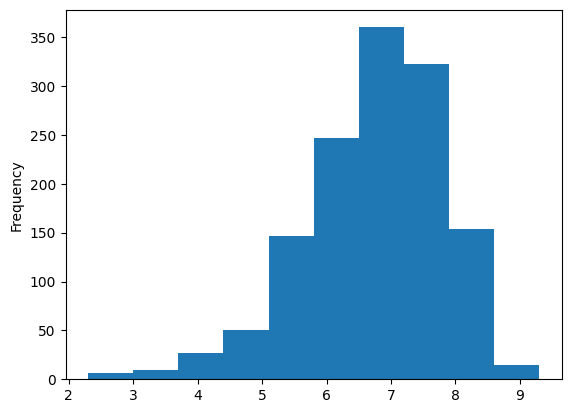

In [ ]:
import matplotlib.pyplot as plt
#Let's create a histogram of IMDB Scores to check the distribution of IMDB Scores across all movies. Histograms are a good way to visualize the distribution of a data set. We use the plot method on the IMDB Scores series from our movies DataFrame and pass it the argument.
movies['IMDB Score'].plot(kind="hist")
plt.show()


##### This data visualization suggests that most of the IMDB Scores fall between six and eight.
##### Getting statistical information about the data
##### Pandas has some very handy methods to look at the statistical data about our data set. For example, we can use the describe method to get a statistical summary of the data set.

In [ ]:
movies.describe()

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
count,1338.000000,1338.000000,1308.000000,1.281000e+03,1.086000e+03,1338.000000,1338.000000,1338.000000,1336.000000,1338.000000,1338.000000,1338.000000,1.338000e+03,1338.000000,1335.000000,1338.000000
mean,1987.289985,113.071001,1.987752,2.712064e+07,4.752741e+07,1026.567265,5255.186846,1227.041106,456.738772,7673.354260,2656.870703,1.167414,8.538817e+04,255.183857,85.108614,6.702167
std,14.124870,27.434048,0.310047,8.466937e+07,6.113161e+07,3446.329257,8652.096738,2891.932284,880.031542,11055.985788,7446.142461,1.608806,1.560198e+05,343.287920,62.040982,1.066497
min,1916.000000,25.000000,1.180000,7.000000e+03,5.494000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,1.000000,1.000000,2.300000
25%,1982.000000,96.000000,1.850000,4.000000e+06,8.182800e+06,6.000000,605.000000,273.000000,136.000000,1412.000000,0.000000,0.000000,9.905500e+03,77.250000,39.000000,6.100000
50%,1993.000000,107.000000,1.850000,1.400000e+07,2.724075e+07,56.500000,925.500000,559.000000,324.000000,2660.000000,17.500000,1.000000,3.370500e+04,159.000000,71.000000,6.800000
75%,1997.000000,123.000000,2.350000,3.300000e+07,6.358500e+07,272.000000,10000.000000,849.000000,586.500000,11937.750000,812.000000,2.000000,9.031425e+04,306.750000,118.000000,7.400000
max,1999.000000,330.000000,2.760000,2.400000e+09,6.586723e+08,21000.000000,49000.000000,29000.000000,13000.000000,74382.000000,108000.000000,15.000000,1.689764e+06,4144.000000,392.000000,9.300000


##### We can also use the corresponding method to access this information one at a time. For example, to get the mean of a particular column, you can use the mean method on that column.


In [ ]:
movies["Gross Earnings"].mean()

np.float64(47527411.287292816)

##### One of the much-used features of Excel is to apply formulas to create new columns from existing column values. In our Excel file, we have Gross Earnings and Budget columns. We can get Net earnings by subtracting Budget from Gross earnings. We could then apply this formula in the Excel file to all the rows. We can do this in pandas also as shown below.


In [ ]:
movies["Net Earnings"] = movies["Gross Earnings"] - movies["Budget"]

In [ ]:
movies[['Title',"Gross Earnings","Budget", "Net Earnings"]].head(10)

,Title,Gross Earnings,Budget,Net Earnings
0,Intolerance: Love's Struggle Throughout the Ages,NaN,385907.0,NaN
1,Over the Hill to the Poorhouse,3000000.0,100000.0,2900000.0
2,The Big Parade,NaN,245000.0,NaN
3,Metropolis,26435.0,6000000.0,-5973565.0
4,Pandora's Box,9950.0,NaN,NaN
5,The Broadway Melody,2808000.0,379000.0,2429000.0
6,Hell's Angels,NaN,3950000.0,NaN
7,A Farewell to Arms,NaN,800000.0,NaN
8,42nd Street,2300000.0,439000.0,1861000.0
9,She Done Him Wrong,NaN,200000.0,NaN


##### Let's use the sort_values method to sort the data by the new column we created and visualize the top 10 movies by Net Earnings.

<Axes: title={'center': 'Top 10 Movies by Net Earnings'}, ylabel='Title'>

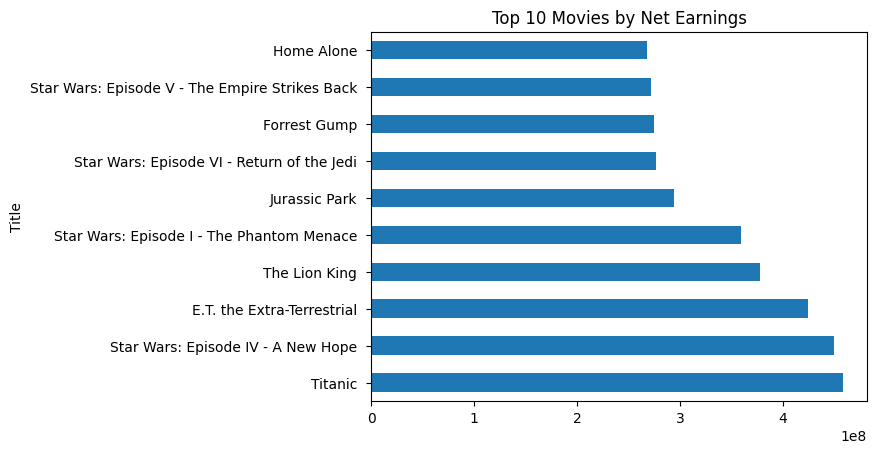

In [ ]:
new_df = movies[["Net Earnings","Title"]].sort_values(['Net Earnings'], ascending=False).head(10)
new_df.plot(kind="barh", x='Title', y='Net Earnings', legend=None, title="Top 10 Movies by Net Earnings")

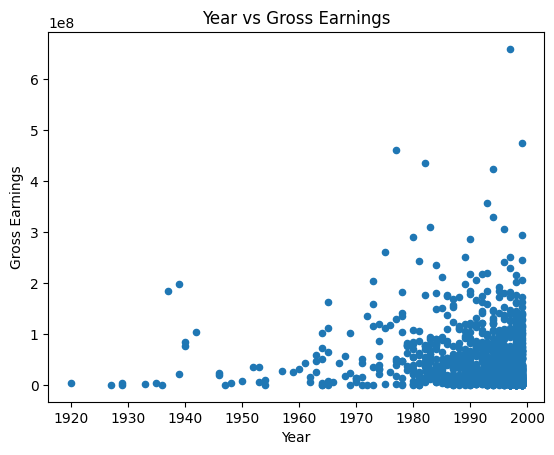

In [ ]:
# Scatter Plot of Distribution of Year and Gross Earnings
movies.plot(kind="scatter", x="Year", y="Gross Earnings", title="Year vs Gross Earnings")
plt.show()

##### Pivot Table in pandas
##### Advanced Excel users also often use pivot tables. A pivot table summarizes the data of another table by grouping the data on an index and applying operations such as sorting, summing, or averaging. You can use this feature in pandas too.
##### We need to first identify the column or columns that will serve as the index, and the column(s) on which the summarizing formula will be applied. Let's start small, by choosing Year as the index column and Gross Earnings as the summarization column and creating a separate DataFrame from this data.


In [ ]:
movies_subset = movies[['Year', 'Gross Earnings']]
movies_subset.head()

,Year,Gross Earnings
0,1916,NaN
1,1920,3000000.0
2,1925,NaN
3,1927,26435.0
4,1929,9950.0


##### We now call pivot_table on this subset of data. The method pivot_table takes a parameter index. As mentioned, we want to use Year as the index.

In [ ]:
earnings_by_year = movies_subset.pivot_table(index=['Year'])
earnings_by_year.head()

,Gross Earnings
Year,
1920,3000000.0
1927,26435.0
1929,1408975.0
1933,2300000.0
1935,3000000.0


##### This gave us a pivot table with grouping on Year and summarization on the sum of Gross Earnings. Notice, we didn't need to specify Gross Earnings column explicitly as pandas automatically identified it the values on which summarization should be applied.
##### We can use this pivot table to create some data visualizations. We can call the plot method on the DataFrame to create a line plot and call the show method to display the plot in the notebook.

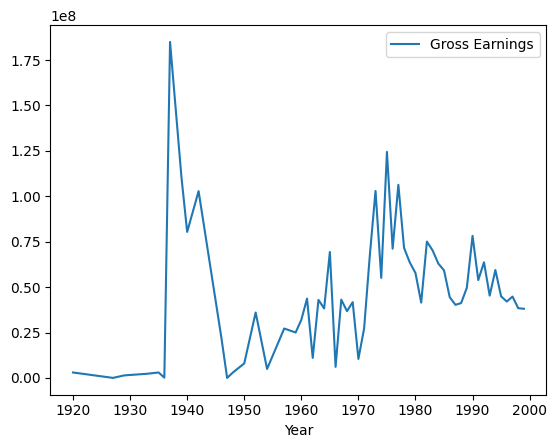

In [ ]:
earnings_by_year.plot()
plt.show()

##### We saw how to pivot with a single column as the index. Things will get more interesting if we can use multiple columns. Let's create another DataFrame subset but this time we will choose the columns, Country, Language and Gross Earnings.


In [ ]:
movies_subset = movies[['Country', 'Language', 'Gross Earnings']]
movies_subset.head()

,Country,Language,Gross Earnings
0,USA,NaN,NaN
1,USA,NaN,3000000.0
2,USA,NaN,NaN
3,Germany,German,26435.0
4,Germany,German,9950.0


##### We will use columns Country and Language as the index for the pivot table. We will use Gross Earnings as summarization table, however, we do not need to specify this explicitly as we saw earlier.

In [ ]:
earnings_by_co_lang = movies_subset.pivot_table(index=['Country', 'Language'])
earnings_by_co_lang.head()

Gross Earnings
Country   Language                  
Aruba     English       1.007614e+07
Australia English       3.367852e+07
Brazil    Portuguese    5.595428e+06
Canada    English       1.771869e+07
          French        9.473382e+06

##### Let's visualize this pivot table with a bar plot. Since there are still few hundred records in this pivot table, we will plot just a few of them.

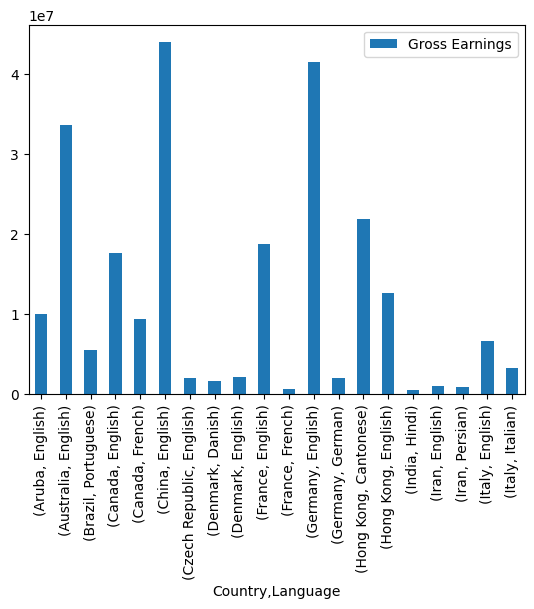

In [ ]:
earnings_by_co_lang.head(20).plot(kind='bar')
plt.show()

##### Exporting the results to Excel

In [ ]:
!pip install openpyxl

In [ ]:
movies.to_excel('output.xlsx')

##### Saving the dataframe to csv file

In [ ]:
movies.to_csv('output.csv')

In [ ]:
movies.to_json("output.json")

##### Saving without index column

In [ ]:
movies.to_excel('output.xlsx', index=False)
movies.to_csv('output.csv', index=False)

In [ ]:
movies.columns

# Assignment

## Part 1 - In Class

In [ ]:
# 1.	Load the excel dataset into a pandas DataFrame.
# 2.	Display the first 10 rows of the dataset.
# 3.	Select only the 'Title', 'Year', 'Country', and 'IMDB Score' columns.
# 4.	Filter the dataset to include only movies released after the year 1990.
# 5.	Find the movie with the highest IMDB Score.
# 6.	Calculate the average duration of movies.
# 7.	Identify movies with a budget greater than $100 million.
# 8.	Create a new column 'Profit' by subtracting 'Budget' from 'Gross Earnings'. Display the first 10 rows of these three columns.
# 9.	Select movie titles that received more than 100,000 User Votes, display it as a list.
# 10.	Find the top 5 movies with the highest Total Facebook Likes - Movie (sum of director and actor likes).
# 11.	Plot a histogram to show the distribution of 'Aspect Ratio' values.
# 12.   Explore the relationship between movie duration and IMDB Score. Create a scatter plot to visualize this relationship.
# 13.   Determine the most common actor in the dataset based on the number of movies they've appeared in.


In [1]:
#1 load the excel dataset into a pandas datafram 
import pandas as pd 

filepath = 'movies.xls'
df = pd.read_excel(filepath)

#2 display the first ten rows: 
df.head(10)

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0
5,The Broadway Melody,1929,Musical|Romance,English,USA,Passed,100,1.37,379000.0,2808000.0,...,77,28,4.0,109,167,8,4546,71,36.0,6.3
6,Hell's Angels,1930,Drama|War,English,USA,Passed,96,1.20,3950000.0,NaN,...,431,12,4.0,457,279,1,3753,53,35.0,7.8
7,A Farewell to Arms,1932,Drama|Romance|War,English,USA,Unrated,79,1.37,800000.0,NaN,...,998,164,99.0,1284,213,1,3519,46,42.0,6.6
8,42nd Street,1933,Comedy|Musical|Romance,English,USA,Unrated,89,1.37,439000.0,2300000.0,...,610,105,45.0,995,439,2,7921,97,65.0,7.7
9,She Done Him Wrong,1933,Comedy|Drama|History|Musical|Romance,English,USA,Approved,66,1.37,200000.0,NaN,...,418,85,28.0,583,328,1,4152,59,35.0,6.5


In [2]:
# 3.	Select only the 'Title', 'Year', 'Country', and 'IMDB Score' columns.

selected_df = df.loc[:, ['Title', 'Year', 'Country', 'IMDB Score']]
selected_df

,Title,Year,Country,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,USA,8.0
1,Over the Hill to the Poorhouse,1920,USA,4.8
2,The Big Parade,1925,USA,8.3
3,Metropolis,1927,Germany,8.3
4,Pandora's Box,1929,Germany,8.0
...,...,...,...,...
1333,Twin Falls Idaho,1999,USA,7.3
1334,Universal Soldier: The Return,1999,USA,4.1
1335,Varsity Blues,1999,USA,6.4
1336,Wild Wild West,1999,USA,4.8


In [3]:

# 4.	Filter the dataset to include only movies released after the year 1990.

filtered_df = df[df['Year'] > 1990]
filtered_df


,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
582,Beastmaster 2: Through the Portal of Time,1991,Action|Adventure|Fantasy|Sci-Fi,English,USA,PG-13,107,1.85,6000000.0,869325.0,...,721,514,284.0,2000,125,2,2281,16,17.0,3.8
583,Bill & Ted's Bogus Journey,1991,Adventure|Comedy|Fantasy|Music|Sci-Fi,English,USA,PG,93,1.85,20000000.0,38037513.0,...,18000,769,636.0,20188,0,2,49680,117,43.0,6.2
584,Boyz n the Hood,1991,Crime|Drama,English,USA,R,112,1.85,6000000.0,57504069.0,...,27,26,15.0,106,0,2,94139,183,64.0,7.8
585,Cape Fear,1991,Crime|Thriller,English,USA,R,128,2.35,35000000.0,79100000.0,...,22000,1000,387.0,24006,0,0,127503,261,120.0,7.3
586,Double Impact,1991,Action|Crime,English,USA,R,110,1.85,15000000.0,30102717.0,...,633,67,51.0,874,0,2,28736,72,40.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Twin Falls Idaho,1999,Drama,English,USA,R,111,1.85,500000.0,985341.0,...,980,505,482.0,3166,180,0,3479,87,54.0,7.3
1334,Universal Soldier: The Return,1999,Action|Sci-Fi,English,USA,R,83,1.85,24000000.0,10431220.0,...,2000,577,485.0,4024,401,0,24216,162,75.0,4.1
1335,Varsity Blues,1999,Comedy|Drama|Romance|Sport,English,USA,R,106,1.85,16000000.0,52885587.0,...,23000,255,35.0,23369,0,0,35312,267,67.0,6.4
1336,Wild Wild West,1999,Action|Comedy|Sci-Fi|Western,English,USA,PG-13,106,1.85,170000000.0,113745408.0,...,10000,4000,582.0,15870,0,2,129601,648,85.0,4.8


In [4]:
# 5.	Find the movie with the highest IMDB Score.

highest_imdb_score_df = df[df['IMDB Score'] == df['IMDB Score'].max()]
highest_imdb_score_df


,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
742,The Shawshank Redemption,1994,Crime|Drama,English,USA,R,142,1.85,25000000.0,28341469.0,...,11000,745,461.0,13495,108000,0,1689764,4144,199.0,9.3


In [5]:
# 6.	Calculate the average duration of movies.

avg_movie_duratin = df['Duration'].mean()
print('averge movie duration : ', avg_movie_duratin)


averge movie duration :  113.07100149476831


In [6]:

# 7.	Identify movies with a budget greater than $100 million.

cond = df['Budget'] > 100000000
result= df[cond]
result


,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
490,Akira,1988,Action|Animation|Sci-Fi,Japanese,Japan,R,124,1.85,1.100000e+09,439162.0,...,6,5,4.0,28,0,0,106160,430,150.0,8.1
605,Terminator 2: Judgment Day,1991,Action|Sci-Fi,English,USA,R,153,2.35,1.020000e+08,204843350.0,...,780,604,539.0,2829,13000,0,744891,983,210.0,8.5
746,True Lies,1994,Action|Comedy|Thriller,English,USA,R,141,2.35,1.150000e+08,146282411.0,...,2000,1000,618.0,4528,0,0,190439,351,94.0,7.2
817,Waterworld,1995,Action|Adventure|Sci-Fi|Thriller,English,USA,PG-13,176,1.85,1.750000e+08,88246220.0,...,711,60,60.0,1004,0,0,144337,309,91.0,6.1
931,Batman & Robin,1997,Action,English,USA,PG-13,125,1.85,1.250000e+08,107285004.0,...,920,890,409.0,2699,0,3,189855,1018,183.0,3.7
945,Dante's Peak,1997,Action|Adventure|Thriller,English,USA,PG-13,108,2.35,1.160000e+08,67155742.0,...,650,293,268.0,1569,0,1,62271,277,93.0,5.8
986,Princess Mononoke,1997,Adventure|Animation|Fantasy,Japanese,Japan,PG-13,134,1.85,2.400000e+09,2298191.0,...,893,851,745.0,2710,11000,0,221552,570,174.0,8.4
997,Speed 2: Cruise Control,1997,Action|Crime|Romance|Thriller,English,USA,PG-13,121,2.35,1.600000e+08,48068396.0,...,673,368,202.0,2027,894,0,60573,248,79.0,3.7
999,Starship Troopers,1997,Action|Sci-Fi|War,English,USA,R,129,1.85,1.050000e+08,54700065.0,...,660,475,423.0,2031,0,0,221521,1049,192.0,7.2
1027,Titanic,1997,Drama|Romance,English,USA,PG-13,194,2.35,2.000000e+08,658672302.0,...,29000,14000,794.0,45223,26000,0,793059,2528,315.0,7.7


In [7]:
# 8.	Create a new column 'Profit' by subtracting 'Budget' from 'Gross Earnings'. Display the first 10 rows of these three columns.

df['Profit'] = df['Gross Earnings'] - df['Budget']
df.loc[:, ['Title', 'Profit']]


,Title,Profit
0,Intolerance: Love's Struggle Throughout the Ages,NaN
1,Over the Hill to the Poorhouse,2900000.0
2,The Big Parade,NaN
3,Metropolis,-5973565.0
4,Pandora's Box,NaN
...,...,...
1333,Twin Falls Idaho,485341.0
1334,Universal Soldier: The Return,-13568780.0
1335,Varsity Blues,36885587.0
1336,Wild Wild West,-56254592.0


In [8]:
# 9.	Select movie titles that received more than 100,000 User Votes, display it as a list.


cond = df['User Votes'] > 100000
res = df[cond]['Title'].to_list()
print(' movie titles that received more than 100,000 User Votes:  ')
print(res)

 movie titles that received more than 100,000 User Votes:  
['Metropolis\xa0', 'Modern Times\xa0', 'Snow White and the Seven Dwarfs\xa0', 'Gone with the Wind\xa0', 'The Wizard of Oz\xa0', 'Casablanca\xa0', "It's a Wonderful Life\xa0", "Singin' in the Rain\xa0", 'On the Waterfront\xa0', 'Seven Samurai\xa0', '12 Angry Men\xa0', 'The Bridge on the River Kwai\xa0', 'Some Like It Hot\xa0', 'Psycho\xa0', 'The Apartment\xa0', 'Dr. No\xa0', 'Lawrence of Arabia\xa0', 'To Kill a Mockingbird\xa0', 'The Great Escape\xa0', 'A Fistful of Dollars\xa0', 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb\xa0', 'Goldfinger\xa0', 'Mary Poppins\xa0', 'The Sound of Music\xa0', 'The Good, the Bad and the Ugly\xa0', '2001: A Space Odyssey\xa0', 'Once Upon a Time in the West\xa0', "Rosemary's Baby\xa0", 'Butch Cassidy and the Sundance Kid\xa0', 'Willy Wonka & the Chocolate Factory\xa0', 'The Godfather\xa0', 'The Exorcist\xa0', 'The Sting\xa0', 'The Godfather: Part II\xa0', 'Young Frankenste

In [9]:
# 10.	Find the top 5 movies with the highest Total Facebook Likes - Movie (sum of director and actor likes).
df.sort_values(['Facebook Likes - cast Total'], ascending=False).head(5)

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score,Profit
1104,Patch Adams,1998,Biography|Comedy|Drama|Romance,English,USA,PG-13,115,2.35,50000000.0,135014968.0,...,22000,878.0,74382,0,1,80580,375,55.0,6.7,85014968.0
693,What's Eating Gilbert Grape,1993,Drama|Romance,English,USA,PG-13,118,1.85,11000000.0,9170214.0,...,29000,472.0,69746,14000,1,171882,292,80.0,7.8,-1829786.0
590,Hook,1991,Adventure|Comedy|Family|Fantasy,English,USA,PG,142,2.35,70000000.0,119654900.0,...,8000,5000.0,64259,13000,1,182802,363,75.0,6.7,49654900.0
958,Good Will Hunting,1997,Drama,English,USA,R,126,1.85,10000000.0,138339411.0,...,13000,893.0,63710,31000,2,604904,682,161.0,8.3,128339411.0
863,Marvin's Room,1996,Drama,English,USA,PG-13,98,1.85,23000000.0,12782508.0,...,22000,11000.0,63194,1000,2,20163,71,45.0,6.7,-10217492.0


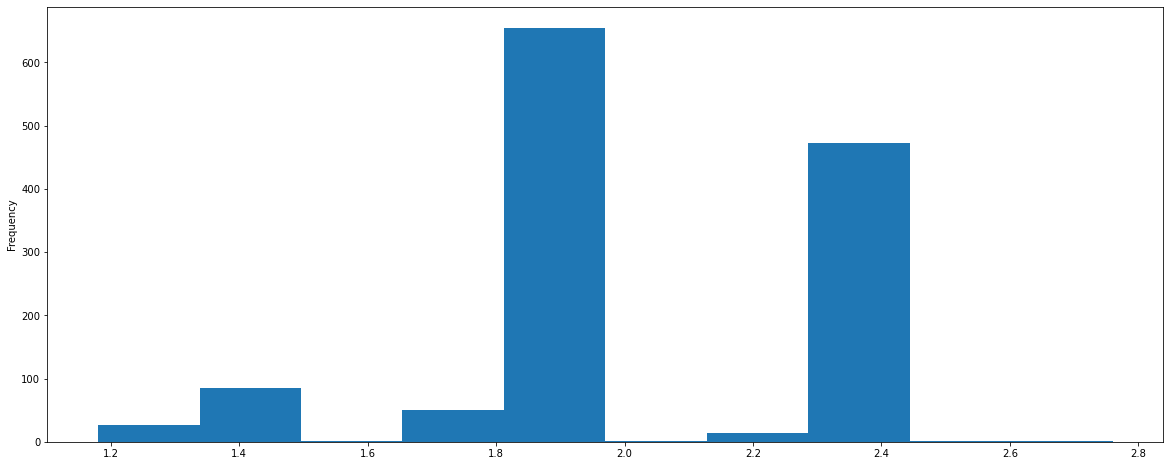

In [10]:
# 11.	Plot a histogram to show the distribution of 'Aspect Ratio' values.
import matplotlib.pyplot as plt 
plt.figure(figsize=(20,8))
df['Aspect Ratio'].plot(kind="hist")
plt.show()

<Figure size 1440x576 with 0 Axes>

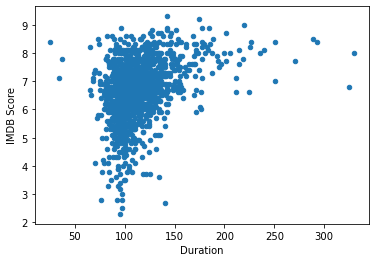

In [11]:
# 12.   Explore the relationship between movie duration and IMDB Score. Create a scatter plot to visualize this relationship.

plt.figure(figsize=(20,8))
df.plot(kind="scatter", x='Duration', y='IMDB Score')

plt.show()

In [12]:
# for debugging 
df.columns

Index(['Title', 'Year', 'Genres', 'Language', 'Country', 'Content Rating',
       'Duration', 'Aspect Ratio', 'Budget', 'Gross Earnings', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Facebook Likes - Director',
       'Facebook Likes - Actor 1', 'Facebook Likes - Actor 2',
       'Facebook Likes - Actor 3', 'Facebook Likes - cast Total',
       'Facebook likes - Movie', 'Facenumber in posters', 'User Votes',
       'Reviews by Users', 'Reviews by Crtiics', 'IMDB Score', 'Profit'],
      dtype='object')

In [13]:
df['Actor 1']

0            Lillian Gish
1            Stephen Carr
2            John Gilbert
3           Brigitte Helm
4           Louise Brooks
              ...        
1333      Sasha Alexander
1334    Michael Jai White
1335          Paul Walker
1336           Will Smith
1337      Saffron Burrows
Name: Actor 1, Length: 1338, dtype: object

In [14]:
# 13.   Determine the most common actor in the dataset based on the number of movies they've appeared in.
concatenated_columns = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
concatenated_columns.value_counts().idxmax()


'Robert De Niro'

## Part 2 -  To Submit on Teams (FLASK API + Client side testing)

In [ ]:
# Use the movies for this exercise
# Create a flask api with the following routes
# 1. /upload - This route should take the movies excel file and insert all of its rows into a MYSQL database having a table with the same columns as the excel file
# 2. /top-movies - This route should return the top 10 movies based on IMDB Score
# 3. /movies-by-year - This route should return the movies released in the given year
# 4. /movies-by-language - This route should return the movies released in the given language 
# 5. /movies-by-country - This route should return the movies released in the given country 
# 6. /update-movie - This route should update the User Votes for the given movie
# 7. /delete-movie - This route should delete the given movie from the database

In [ ]:
dict(df.dtypes)

{'Title': dtype('O'),
 'Year': dtype('int64'),
 'Genres': dtype('O'),
 'Language': dtype('O'),
 'Country': dtype('O'),
 'Content Rating': dtype('O'),
 'Duration': dtype('int64'),
 'Aspect Ratio': dtype('float64'),
 'Budget': dtype('float64'),
 'Gross Earnings': dtype('float64'),
 'Director': dtype('O'),
 'Actor 1': dtype('O'),
 'Actor 2': dtype('O'),
 'Actor 3': dtype('O'),
 'Facebook Likes - Director': dtype('int64'),
 'Facebook Likes - Actor 1': dtype('int64'),
 'Facebook Likes - Actor 2': dtype('int64'),
 'Facebook Likes - Actor 3': dtype('float64'),
 'Facebook Likes - cast Total': dtype('int64'),
 'Facebook likes - Movie': dtype('int64'),
 'Facenumber in posters': dtype('int64'),
 'User Votes': dtype('int64'),
 'Reviews by Users': dtype('int64'),
 'Reviews by Crtiics': dtype('float64'),
 'IMDB Score': dtype('float64'),
 'Profit': dtype('float64')}

In [50]:
# get the columns of columns of the table: 
df.columns.tolist()

['Title',
 'Year',
 'Genres',
 'Language',
 'Country',
 'Content Rating',
 'Duration',
 'Aspect Ratio',
 'Budget',
 'Gross Earnings',
 'Director',
 'Actor 1',
 'Actor 2',
 'Actor 3',
 'Facebook Likes - Director',
 'Facebook Likes - Actor 1',
 'Facebook Likes - Actor 2',
 'Facebook Likes - Actor 3',
 'Facebook Likes - cast Total',
 'Facebook likes - Movie',
 'Facenumber in posters',
 'User Votes',
 'Reviews by Users',
 'Reviews by Crtiics',
 'IMDB Score',
 'Profit']

In [54]:
mapped_col_names = { 
    colname:colname.replace(" ", "_") 
    for colname in df.columns.to_list()
}
mapped_col_names

{'Title': 'Title',
 'Year': 'Year',
 'Genres': 'Genres',
 'Language': 'Language',
 'Country': 'Country',
 'Content Rating': 'Content_Rating',
 'Duration': 'Duration',
 'Aspect Ratio': 'Aspect_Ratio',
 'Budget': 'Budget',
 'Gross Earnings': 'Gross_Earnings',
 'Director': 'Director',
 'Actor 1': 'Actor_1',
 'Actor 2': 'Actor_2',
 'Actor 3': 'Actor_3',
 'Facebook Likes - Director': 'Facebook_Likes_-_Director',
 'Facebook Likes - Actor 1': 'Facebook_Likes_-_Actor_1',
 'Facebook Likes - Actor 2': 'Facebook_Likes_-_Actor_2',
 'Facebook Likes - Actor 3': 'Facebook_Likes_-_Actor_3',
 'Facebook Likes - cast Total': 'Facebook_Likes_-_cast_Total',
 'Facebook likes - Movie': 'Facebook_likes_-_Movie',
 'Facenumber in posters': 'Facenumber_in_posters',
 'User Votes': 'User_Votes',
 'Reviews by Users': 'Reviews_by_Users',
 'Reviews by Crtiics': 'Reviews_by_Crtiics',
 'IMDB Score': 'IMDB_Score',
 'Profit': 'Profit'}

In [25]:
x = df.Title.dtype

if x == 'O': 
    print('yes take it as string')

yes take it as string


In [26]:
print("\"")

"
